In [1]:
import numpy as np
import matplotlib
import pandas as pd

dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)
X_test = pd.DataFrame(test.iloc[:,4:15].values)
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [2]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization

2024-07-01 14:52:36.916408: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [4]:
# Initialize MLP model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mae')

# Print model summary
mlp_model.summary()

# Train the model
history = mlp_model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_split=0.2)

# Evaluate model performance
Y_pred = mlp_model.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 33.2616 - val_loss: 21.6836
Epoch 2/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.3811 - val_loss: 20.5594
Epoch 3/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.2142 - val_loss: 19.5658
Epoch 4/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.9130 - val_loss: 18.4270
Epoch 5/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.6484 - val_loss: 18.0099
Epoch 6/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.8596 - val_loss: 17.7365
Epoch 7/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.8764 - val_loss: 16.7252
Epoch 8/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.1516 - val_loss: 15.9667
Epoch 9/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.5134 - val_loss: 16.0194
Epoch 10/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.7620 - val_loss: 16.2140
Epoch 11/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.5447 - val_loss: 15.4566
Epoch 12/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 

In [23]:
history = mlp_model.fit(X_train_scaled, Y_train, epochs=1000, batch_size=32, validation_split=0.2)

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4300 - val_loss: 8.5372
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2816 - val_loss: 8.0267
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8145 - val_loss: 8.7428
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0755 - val_loss: 8.2576
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7382 - val_loss: 9.0392
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8691 - val_loss: 8.0691
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7801 - val_loss: 8.7429
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1377 - val_loss: 7.9087
Epoch 9/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9452 - val_loss: 8.3961
Epoch 10/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4694 - val_loss: 8.7504
Epoch 11/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2402 - val_loss: 8.0502
Epoch 12/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [24]:
res = mlp_model.predict(X_test_scaled)
print(res)
print(Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[ 3.83888   ]
 [42.985096  ]
 [ 1.8395431 ]
 [ 3.6097279 ]
 [ 6.2215543 ]
 [23.779182  ]
 [ 8.587093  ]
 [ 3.8358617 ]
 [ 6.5716763 ]
 [19.547161  ]
 [ 1.8058834 ]
 [21.22631   ]
 [ 8.022234  ]
 [28.54121   ]
 [ 2.67377   ]
 [36.25046   ]
 [ 6.794921  ]
 [31.84937   ]
 [ 5.904336  ]
 [22.000378  ]
 [ 9.451277  ]
 [37.49654   ]
 [ 5.2625623 ]
 [ 8.192462  ]
 [ 3.9737573 ]
 [ 8.963229  ]
 [53.88847   ]
 [15.803156  ]
 [55.973686  ]
 [ 5.772875  ]
 [12.410487  ]
 [32.460674  ]
 [ 1.1021786 ]
 [28.806072  ]
 [18.947346  ]
 [39.461792  ]
 [12.093257  ]
 [13.193326  ]
 [25.669792  ]
 [ 2.936967  ]
 [39.00204   ]
 [18.641216  ]
 [62.146877  ]
 [21.170094  ]
 [13.2509575 ]
 [12.295225  ]
 [ 3.1207185 ]
 [38.571465  ]
 [30.766338  ]
 [86.6162    ]
 [12.759993  ]
 [ 8.758213  ]
 [ 7.8127265 ]
 [10.559243  ]
 [20.482033  ]
 [29.951454  ]
 [50.890663  ]
 [19.838821  ]
 [ 5.9793124 ]
 [22.056377  ]
 [ 2.9293704 ]
 [39.314404  ]
 [14.706336  ]
 [33.628857  ]
 [

In [25]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)

0.764788648315585


In [8]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)

18.9582852379481


In [9]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

0.7818636881476971


In [10]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)

26.32375555124259


In [11]:
import shap

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [13]:
explainer = shap.KernelExplainer(mlp_model,data = X_test, link = "identity")
shap_values = explainer.shap_values(X_test_scaled)




100%|██████████| 96/96 [01:05<00:00,  1.47it/s]


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(5,),activation='logistic', max_iter=10000,learning_rate='invscaling',random_state=0)
)
model.fit(X_train_scaled,Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', hidden_layer_sizes=(5,),
                              learning_rate='invscaling', max_iter=10000,
                              random_state=0))])

In [15]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [16]:
# from sklearn.neural_network import MLPRegressor
# regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)

In [17]:
explainer = shap.KernelExplainer(model=model.predict, data=X_train, link="identity")
shap_values = explainer.shap_values(X_test, nsamples=100)

Using 743 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 96/96 [00:42<00:00,  2.27it/s]


In [18]:
import matplotlib.pyplot as plt 

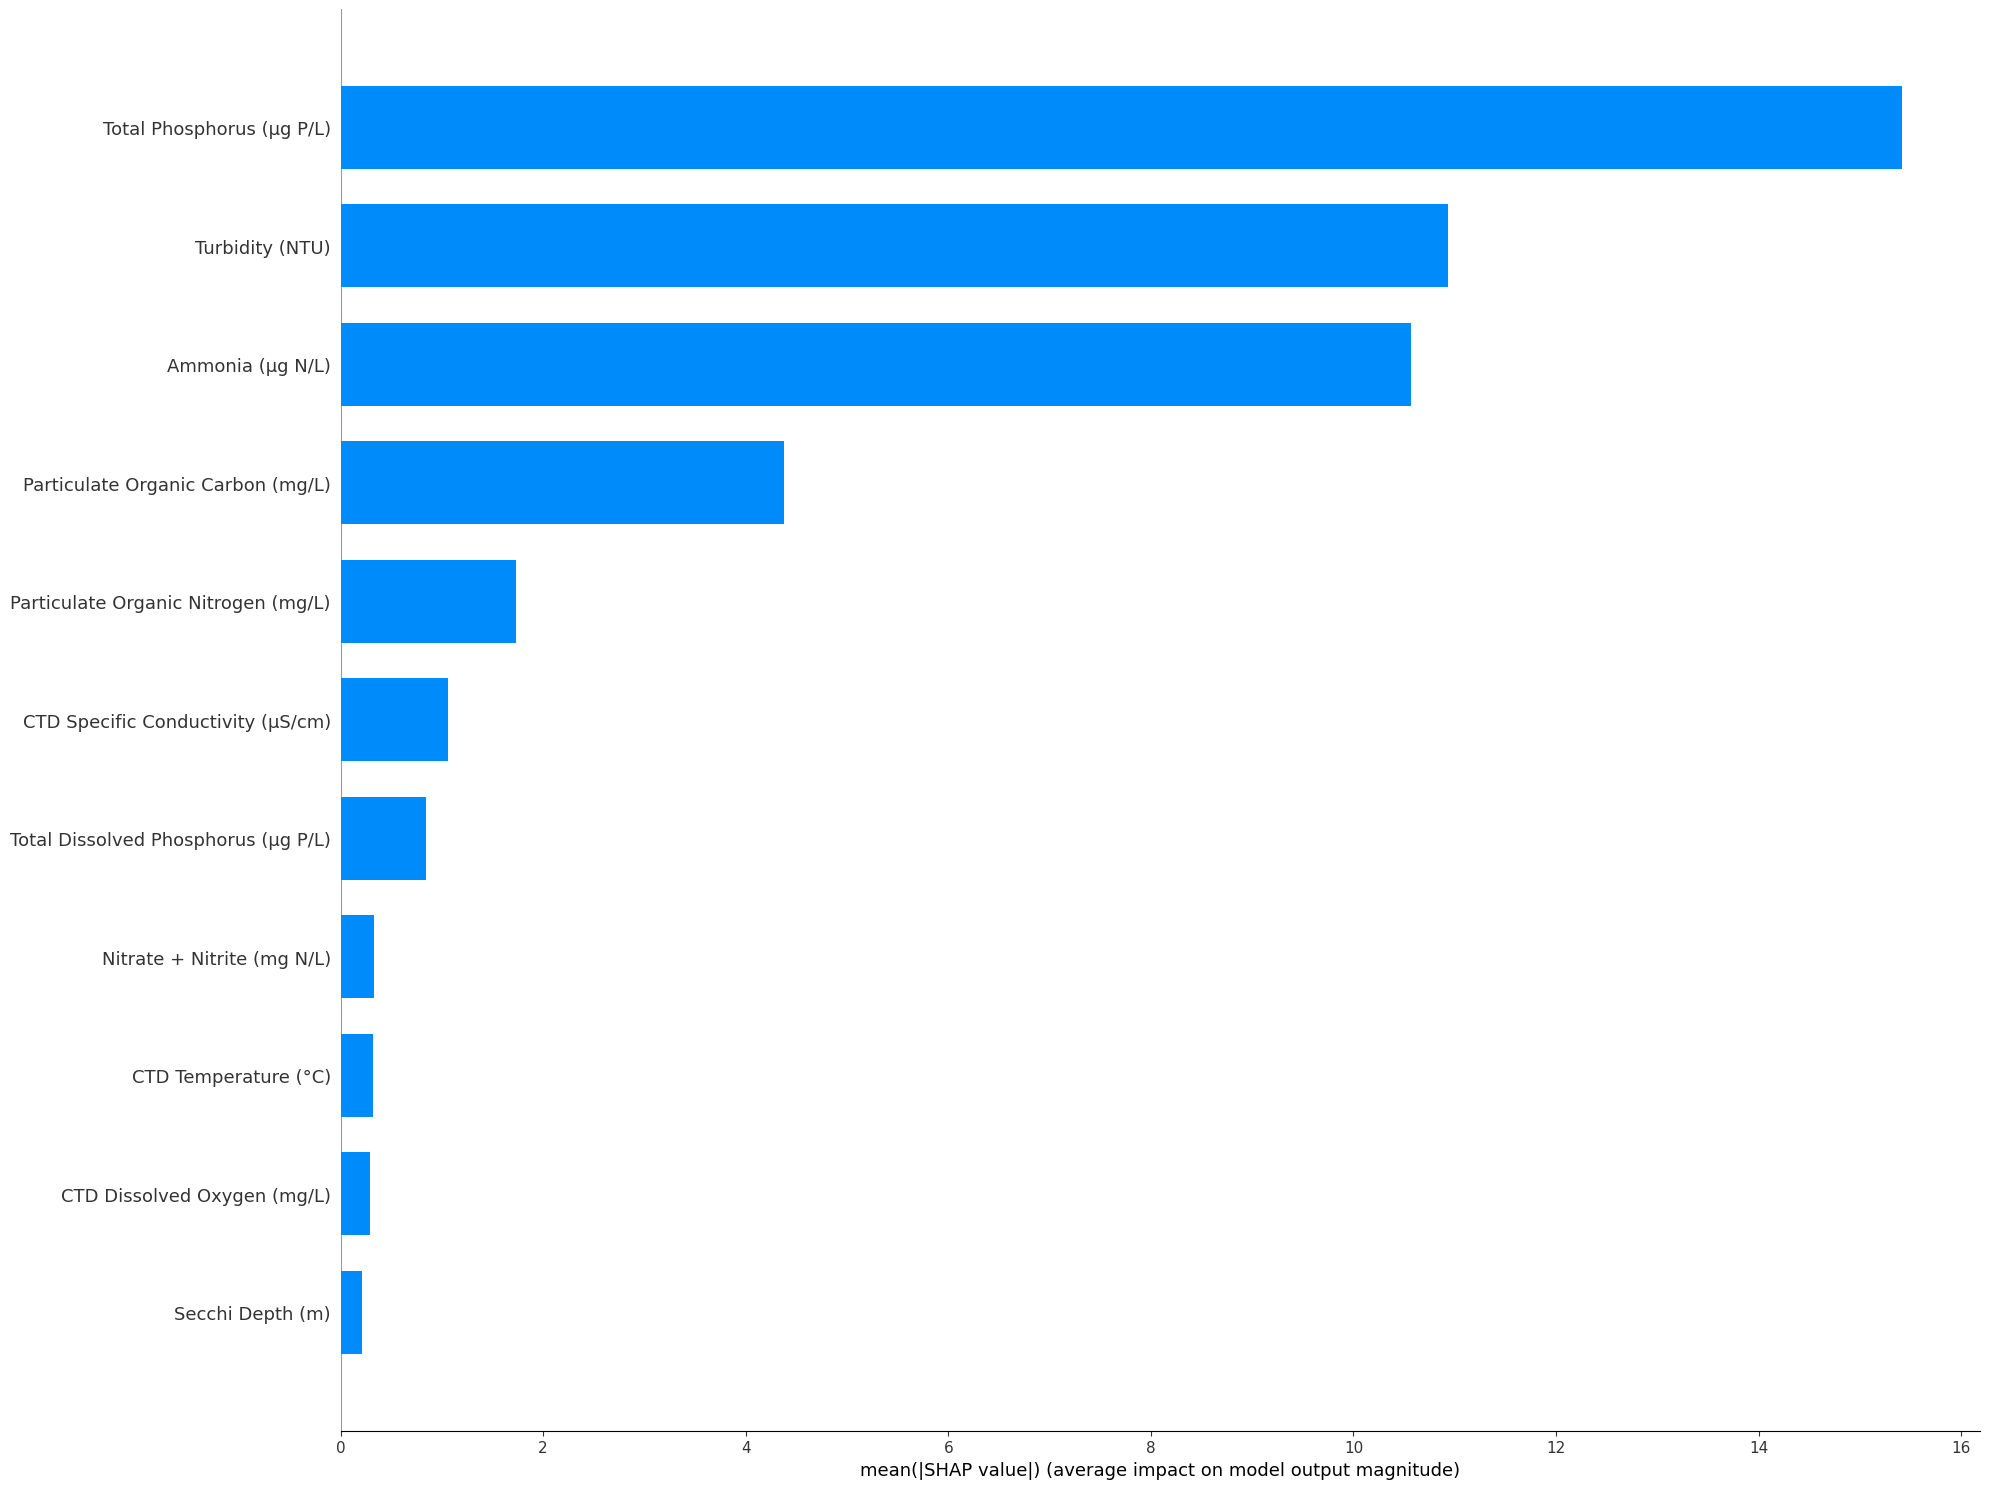

In [19]:
shap.summary_plot(shap_values, X_test,feature_names = features,plot_type="bar",plot_size=(20,15),show=False)

100%|██████████| 96/96 [07:04<00:00,  4.42s/it]


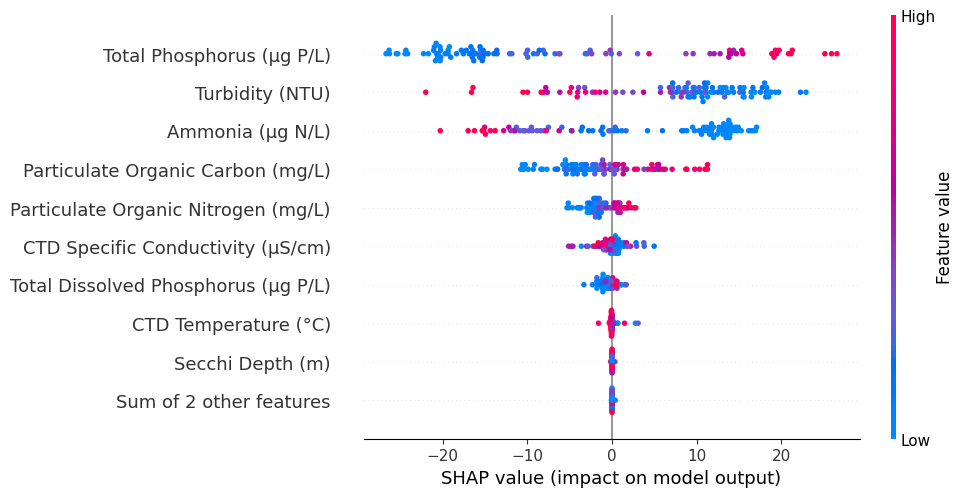

In [26]:
X_test_shap = pd.DataFrame(test.iloc[:,4:15])
shap_values = explainer(X_test_shap)
shap.plots.beeswarm(shap_values=shap_values)

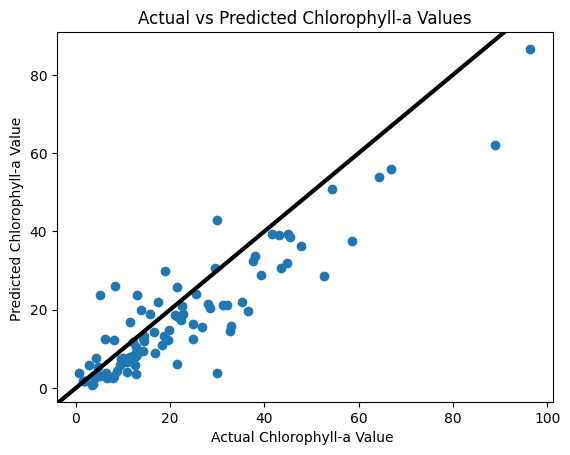

In [27]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, res)
plt.xlabel('Actual Chlorophyll-a Value ')
plt.ylabel('Predicted Chlorophyll-a Value ')
plt.title('Actual vs Predicted Chlorophyll-a Values')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=3, scalex=False, scaley=False)
plt.show()